In [147]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline


In [153]:
class logisticReg:
    
    def __init__(self):
        print("logisticReg class started")
        self.X_train_org, self.Y_train_org, self.X_test_org,self.Y_test_org, self.classes = self.dataset_load()
        self.m_train = self.X_train_org.shape[0]
        self.m_test = self.X_test_org.shape[0]
        
        print("size of the dataset:",+self.m_train,"test set:",+self.m_test)
        self.X_flatten_train = self.X_train_org.reshape(self.m_train, -1).T
        print("sanity check after flatten", str(self.X_flatten_train[0:5,0]))
        self.X_train = self.X_flatten_train/255
        self.X_flatten_test = (self.X_test_org.reshape(self.m_test, -1).T)
        self.X_test = self.X_flatten_test/255
        print("size of X_train after flatten and normalization",self.X_train.shape,"size of Y",self.Y_train_org.shape)
        
    def wt_init(self):
        print("initializing wieghts")
        self.w = np.zeros((self.X_train.shape[0],1))
        self.b = 0
        print("size of w",self.w.shape)
        
    def dataset_load(self):
        print("loading the dataset")
        train_dataset = h5py.File('../../DL/Course_1_NeuralNetwork_DeepLearning/Week 2/Logistic Regression as a Neural Network/datasets/train_catvnoncat.h5', "r")
        train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
        train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

        test_dataset = h5py.File('../../DL/Course_1_NeuralNetwork_DeepLearning/Week 2/Logistic Regression as a Neural Network/datasets/test_catvnoncat.h5', "r")
        test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
        test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

        classes = np.array(test_dataset["list_classes"][:]) # the list of classes

        train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
        test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

        return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
        
    
        
    def wt_train(self):
        #print("training the model")
        z = np.dot(self.w.T,self.X_train)+self.b
        y_hat = sigmoid(z)
        #print("y_hat",y_hat.shape)
        
        cost = (-1/self.m_train)*np.sum(np.dot(self.Y_train_org,np.log(y_hat.T))+np.dot((1-self.Y_train_org),np.log(1-y_hat.T)))
        
        self.dw = (1/self.m_train)*np.dot(self.X_train,(y_hat-self.Y_train_org).T)
        self.db = (1/self.m_train)*np.sum(y_hat-self.Y_train_org)
        cost = np.squeeze(cost)
        
        return cost
        
    def optimize(self,learning_rate, iteration):
        print("Optimizing the model")
        costs = []
        for i in range(iteration):
            cost = self.wt_train()
            self.w = self.w - learning_rate*self.dw
            self.b = self.b - learning_rate*self.db
            
            if i%100 == 0:
                costs.append(cost)
                #print("cost = ", cost)
        
        return costs
    
    def predict(self,X):
        print("Predicting")
        y_prediction = np.zeros((1, X.shape[1]))
        z = np.dot(self.w.T,X)+self.b
        y_hat = sigmoid(z)
        
        for i in range(X.shape[1]):
            if y_hat[0,i] < 0.5:
                y_prediction[0,i] = 0
            else:
                y_prediction[0,i] = 1
        
        return y_prediction
    
    def model(self, learning_rate, iteration):
        parameters = self.wt_init()
        
        costs = []
        costs = self.optimize(learning_rate, iteration)
    
        #plt.plot(costs)
        #plt.ylabel("cost")
        #plt.xlabel("iteration per hundred")
        #plt.title("learning rate =" +str(learning_rate))
        #plt.show()
    
        Y_Prediction_test = self.predict(self.X_test)
        Y_Prediction_train = self.predict(self.X_train)
    
        train_accuracy = 100 - np.mean(np.abs(Y_Prediction_train - self.Y_train_org))*100
        test_accuracy = 100 - np.mean(np.abs(Y_Prediction_test - self.Y_test_org))*100
    
        print("Train Accuracy {}%",train_accuracy)
        print("Test Accuracy {}%",test_accuracy)
        
        d = {"costs":costs,
             "learningRate":learning_rate}
        
        return d
            
def sigmoid(a):
    return 1/(1+np.exp(-a))

logisticReg class started
loading the dataset
size of the dataset: 209 test set: 50
sanity check after flatten [17 31 56 22 33]
size of X_train after flatten and normalization (12288, 209) size of Y (1, 209)
Learning Rate 
 0.005
initializing wieghts
size of w (12288, 1)
Optimizing the model
Predicting
Predicting
Train Accuracy {}% 99.043062201
Test Accuracy {}% 70.0


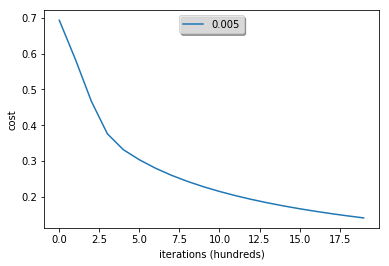

(681, 1024, 3)
(12288, 1)
Predicting
y = 1.0, your algorithm predicts a "cat" picture.


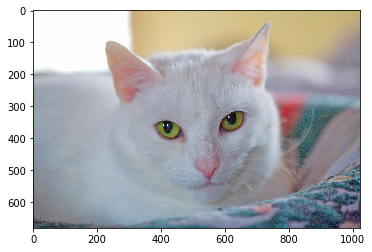

In [156]:
def main():
    #learningRate = [0.05,0.005,0.0005]  # To check response from multiple learning rate
    learningRate = [0.005]
    models = {}
    LR = logisticReg()
    
    for i in learningRate:
        print("Learning Rate \n", i)
        models[str(i)] = LR.model(i,2000)
        
    for i in learningRate:
        plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learningRate"]))
     
    plt.ylabel('cost')
    plt.xlabel('iterations (hundreds)')

    legend = plt.legend(loc='upper center', shadow=True)
    frame = legend.get_frame()
    frame.set_facecolor('0.90')
    plt.show()
    
    # To check your image
    my_image = "my_image.jpg"   

# We preprocess the image to fit your algorithm.
    fname = "../../DL/Course_1_NeuralNetwork_DeepLearning/Week 2/Logistic Regression as a Neural Network/images/" + my_image
    image = np.array(ndimage.imread(fname, flatten=False))
    my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
    my_predicted_image = LR.predict(my_image)

    plt.imshow(image)
    print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + LR.classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")
    
    return
    
main()        